In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

%matplotlib inline

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [127]:
atussum = pd.read_csv('data/atussum_2014.dat') 


In [128]:
corr = atussum.corr()
atussum.rename(columns={'TEAGE':'Age', 'TESEX':'Sex', 'tucaseid':'ID', 't050101':'working', 't010101':'sleeping'}, inplace=True)
w_data = atussum[atussum.Sex == 2]
yw_data = w_data[w_data.Age < 26]
m_data = atussum[atussum.Sex == 1]
ym_data = m_data[m_data.Age <26]


# Time Spent in Classes/Studying in Men and Women under 25

I decided to focus my time analysis on the younger generation, namely men and women who are under the age of 25. I started by looking at the number of people who reported taking some kind of class for educational purposes on their diary day and then looked at the amount of studying they did on the same day. 

The number of people taking classes was similar, 11% of women and 12% of men under 25 stated they had gone to class and they had similar averages. 313 minutes for women, 336 for men. That's about 5 - 5.5 hours.

The truely interesting part of this area of analysis came in polling the people who reported studying or doing research for a class. For women under 25, 11% the respondents reporting doing some form of studying, which makes sense given that 11% of women said that they went to class that day. These women averaged 173 minutes of studying. That's almost 3 hours! 

The men however, are clearly not as studious. 7% of the respondents reported studying or doing research that day, which pales in comparison to the women. Even of those who did study, they only averaged 128 minutes, approximately two thirds of what the women were claiming. 

11% of women under 25 reported spending time taking classes


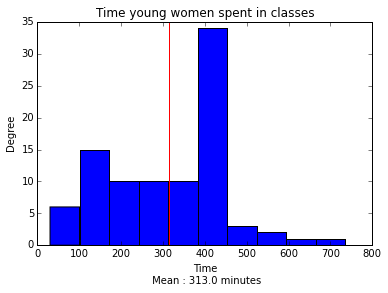

In [129]:
yw_class = round(len(yw_data['t060101'].unique())/len(yw_data['t060101'])*100)
print("{}% of women under 25 reported spending time taking classes".format(yw_class))
yw_class = yw_data[yw_data['t060101'] > 0]
yw_class_mean = yw_class['t060101'].mean()
yw_class['t060101'].plot(kind='hist', title='Time young women spent in classes')
plt.xlabel("Time\n Mean : {} minutes".format(round(yw_class_mean)))
ymin, ymax = plt.ylim()
plt.vlines(yw_class_mean, 0, ymax, color='red')
plt.show()

12% of men under 25 reported spending time taking classes


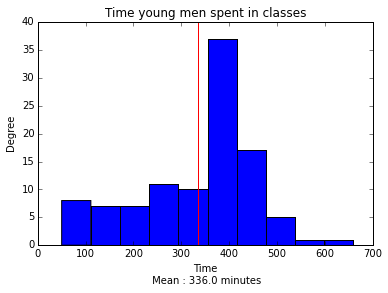

In [130]:
ym_class = round(len(ym_data['t060101'].unique())/len(ym_data['t060101'])*100)
print("{}% of men under 25 reported spending time taking classes".format(ym_class))
ym_class = ym_data[ym_data['t060101'] > 0]
ym_class_mean = ym_class['t060101'].mean()
ym_classes_mean = ym_class['t060101'].mean()
ym_class['t060101'].plot(kind='hist', title='Time young men spent in classes')
plt.xlabel("Time\n Mean : {} minutes".format(round(ym_class_mean)))
ymin, ymax = plt.ylim()
plt.vlines(ym_classes_mean, 0, ymax, color='red')
plt.show()

11% of women under 25 reported spending time taking studying


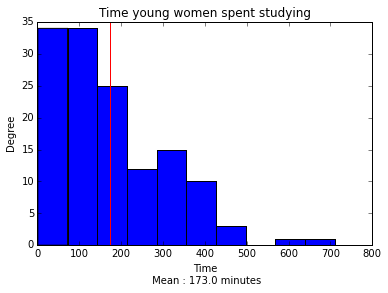

In [131]:
w_study = round(len(yw_data['t060301'].unique())/len(yw_data['t060301'])*100)
print("{}% of women under 25 reported spending time taking studying".format(w_study))
yw_study = yw_data[yw_data['t060301'] > 0]
yw_studying_mean = yw_study['t060301'].mean()
yw_study['t060301'].plot(kind='hist', title='Time young women spent studying')
plt.xlabel("Time\n Mean : {} minutes".format(round(yw_studying_mean)))
ymin, ymax = plt.ylim()
plt.vlines(yw_studying_mean, 0, ymax, color='red')
plt.show()

7% of men under 25 reported spending time taking studying


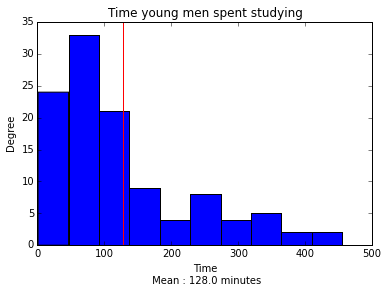

In [132]:
m_study = round(len(ym_data['t060301'].unique())/len(ym_data['t060301'])*100)
print("{}% of men under 25 reported spending time taking studying".format(m_study))
ym_study = ym_data[ym_data['t060301'] > 0]
ym_studying_mean = ym_study['t060301'].mean()
ym_study['t060301'].plot(kind='hist', title='Time young men spent studying')
plt.xlabel("Time\n Mean : {} minutes".format(round(ym_studying_mean)))
ymin, ymax = plt.ylim()
plt.vlines(ym_studying_mean, 0, ymax, color='red')
plt.show()

# Men and Women taking care of household children

I next looked at the number of young men and women who reported taking physical care of household children. I decided that for people under 18, it made sense to include those who were potentially taking care of younger siblings as well. 
9% of the women polled reported taking care of household children and spent an average of 80 minutes doing so. 

In comparison, only 3% of the men reported taking care of household children, and of those, they only averaged 34 minutes. 

9% of women under 25 reported spending time taking care of household children


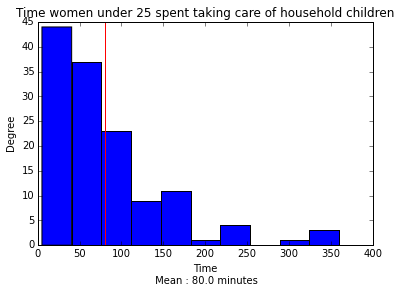

In [133]:
yw_children = round(len(yw_data['t030101'].unique())/len(yw_data['t030101'])*100)
print("{}% of women under 25 reported spending time taking care of household children".format(yw_children))
yw_children = yw_data[yw_data['t030101'] > 0]
yw_children_mean = yw_children['t030101'].mean()
yw_children['t030101'].plot(kind='hist', title='Time women under 25 spent taking care of household children')
plt.xlabel("Time\n Mean : {} minutes".format(round(yw_children_mean)))
ymin, ymax = plt.ylim()
plt.vlines(yw_children_mean, 0, ymax, color='red')
plt.show()

3% of men under 25 reported spending time taking care of household children


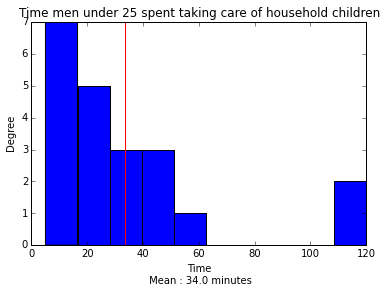

In [134]:
ym_children = round(len(ym_data['t030101'].unique())/len(ym_data['t030101'])*100)
print("{}% of men under 25 reported spending time taking care of household children".format(ym_children))
ym_children = ym_data[ym_data['t030101'] > 0]
ym_children_mean = ym_children['t030101'].mean()
ym_children['t030101'].plot(kind='hist', title='Time men under 25 spent taking care of household children')
plt.xlabel("Time\n Mean : {} minutes".format(round(ym_children_mean)))
ymin, ymax = plt.ylim()
plt.vlines(ym_children_mean, 0, ymax, color='red')
plt.show()

# Grooming amongst Men and Women

I next looked at the time spent grooming for both all ages of men and women, and then specifically at younger men and women again. 

It is interesting to note that not a high percentage of men or women of any age reported spending any time grooming. It is possible this is because a large majority of people don't think to report of the time the spend combing their hair and brushing their teeth, etc. However, there are still interesting trends to report.

Overall, women definitely spent more time grooming than men. Women of all ages reported an average of 57 minutes grooming in comparison to 43 minutes reported by men of all ages. When taken as a sample of all ages, 2% of both men and women reported spending time grooming on their diary day.

Interestingly, of the younger population, 9% of both men and women reported grooming. The younger women also spent slightly more time grooming, 64 minutes as opposed to 57 reported by all ages. The younger men reported the same 43 minutes as an average time. It is somewhat expected to see this trend of younger people spending more time on their grooming and therefore appearance.

2% of women reported spending time grooming


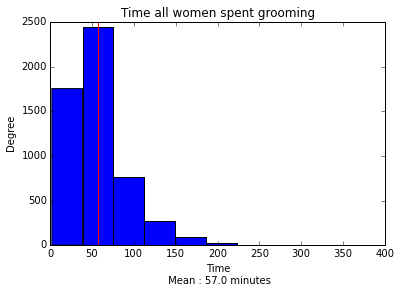

In [135]:
w_groom = round(len(w_data['t010201'].unique())/len(w_data)*100)
print("{}% of women reported spending time grooming".format(w_groom))
w_grooming = w_data[w_data['t010201'] > 0]
w_grooming_mean = w_grooming['t010201'].mean()
w_grooming['t010201'].plot(kind='hist', title='Time all women spent grooming')
plt.xlabel("Time\n Mean : {} minutes".format(round(w_grooming_mean)))
ymin, ymax = plt.ylim()
plt.vlines(w_grooming_mean, 0, ymax, color='red')
plt.show()

2% of men reported spending time grooming


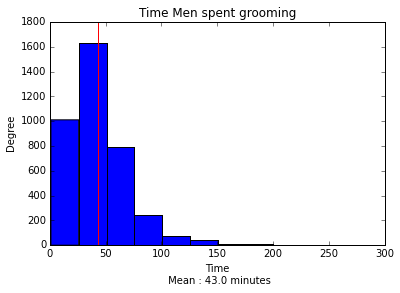

In [136]:
m_groom = round(len(m_data['t010201'].unique())/len(m_data)*100)
print("{}% of men reported spending time grooming".format(m_groom))
m_grooming = m_data[m_data['t010201'] > 0]
m_grooming_mean = m_grooming['t010201'].mean()
m_grooming['t010201'].plot(kind='hist', title='Time Men spent grooming')
plt.xlabel("Time\n Mean : {} minutes".format(round(m_grooming_mean)))
ymin, ymax = plt.ylim()
plt.vlines(m_grooming_mean, 0, ymax, color='red')
plt.show()

9% of women under 25 reported spending time grooming


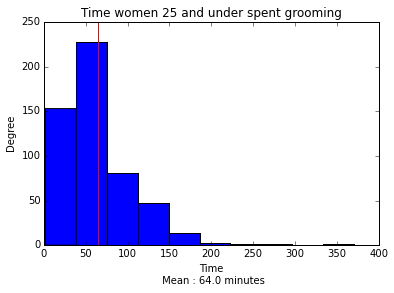

In [137]:
yw_groom = round(len(yw_data['t010201'].unique())/len(yw_data)*100)
print("{}% of women under 25 reported spending time grooming".format(yw_groom))
yw_grooming = yw_data[yw_data['t010201'] > 0]
yw_grooming_mean = yw_grooming['t010201'].mean()
yw_grooming['t010201'].plot(kind='hist', title='Time women 25 and under spent grooming')
plt.xlabel("Time\n Mean : {} minutes".format(round(yw_grooming_mean)))
ymin, ymax = plt.ylim()
plt.vlines(yw_grooming_mean, 0, ymax, color='red')
plt.show()

9% of men under 25 reported spending time grooming


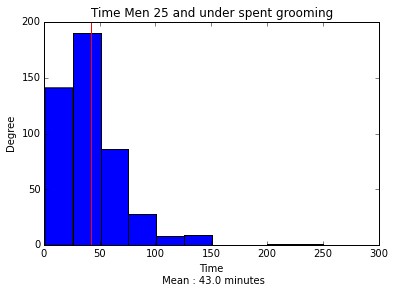

In [138]:
ym_groom = round(len(ym_data['t010201'].unique())/len(ym_data)*100)
print("{}% of men under 25 reported spending time grooming".format(ym_groom))
ym_grooming = ym_data[ym_data['t010201'] > 0]
ym_grooming_mean = ym_grooming['t010201'].mean()
ym_grooming['t010201'].plot(kind='hist', title='Time Men 25 and under spent grooming')
plt.xlabel("Time\n Mean : {} minutes".format(round(ym_grooming_mean)))
ymin, ymax = plt.ylim()
plt.vlines(ym_grooming_mean, 0, ymax, color='red')
plt.show()